# 322.Coin Change
You are given coins of different denominations and a total amount of money amount. Write a function to compute the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

Example 1:

Input: coins = [1, 2, 5], amount = 11
    
Output: 3 
Explanation: 11 = 5 + 5 + 1

## Constraints
    Do the coins have to reach exactly n cents?
    Yes
    Can we assume we have an infinite number of coins to make n cents?
    Yes
    Do we need to report the combination(s) of coins that represent the minimum?
    No
    Can we assume the coin denominations are given in sorted order?
    No
    Can we assume this fits memory?
    Yes
## Test Cases
coins: None or n: None -> Exception
        
coins: [] or n: 0 -> 0
        
coins: [1, 2, 3] or [3, 2, 1] -> 2

## Algorithm

## Approach 1 (Brute force) [Time Limit Exceeded]
Intuition

The problem could be modeled as the following optimization problem : $\min_{x} \sum_{i=0}^{n - 1} x_i \\ \text{subject to} \sum_{i=0}^{n - 1} x_i*c_i = S $ , where S is the amount, $c_i$ is the coin denominations, $x_i$ is the number of coins with denominations $c_i$ used in change of amount S. We could easily see that $x_i = [{0, \frac{S}{c_i}}]$.

A trivial solution is to enumerate all subsets of coin frequencies $ [x_0\dots x_{n - 1}]$ that satisfy the constraints above, compute their sums and return the minimum among them.

To apply this idea, the algorithm uses backtracking technique to generate all combinations of coin frequencies $[x_0\dots x_{n-1}]$in the range $([{0, \frac{S}{c_i}}])$ which satisfy the constraints above. It makes a sum of the combinations and returns their minimum or -1 in case there is no acceptable combination.



## Approach 2: Dynamic programming -Bottom up

* F(S) - minimum number of coins needed to make change for amount S using coin denominations $[{c_0\ldots c_{n-1}}]$
* Optimal substructure property: In other words, the optimal solution can be constructed from optimal solutions of its subproblems. How to split the problem into subproblems? Let's assume that we know $F(S)$ where some change $val_1, val_2, \ldotsval $ for S which is optimal and the last coin's denomination is C. Then the following equation should be true because of optimal substructure of the problem:

$ F(S) = F(S - C) + 1 $ 

But we don't know which is the denomination of the last coin C. We compute $F(S - c_i)$ for each possible denomination $c_0, c_1, c_2 \ldots c_{n -1}$ and choose the minimum among them. The following recurrence relation holds:

$ F(S) = \min_{i=0 ... n-1} { F(S - c_i) } + 1 \\ \text{subject to} \ S-c_i \geq 0 $
$ F(S) = 0 , \text{when} S = 0 $
$ F(S)=−1,when n=0 $

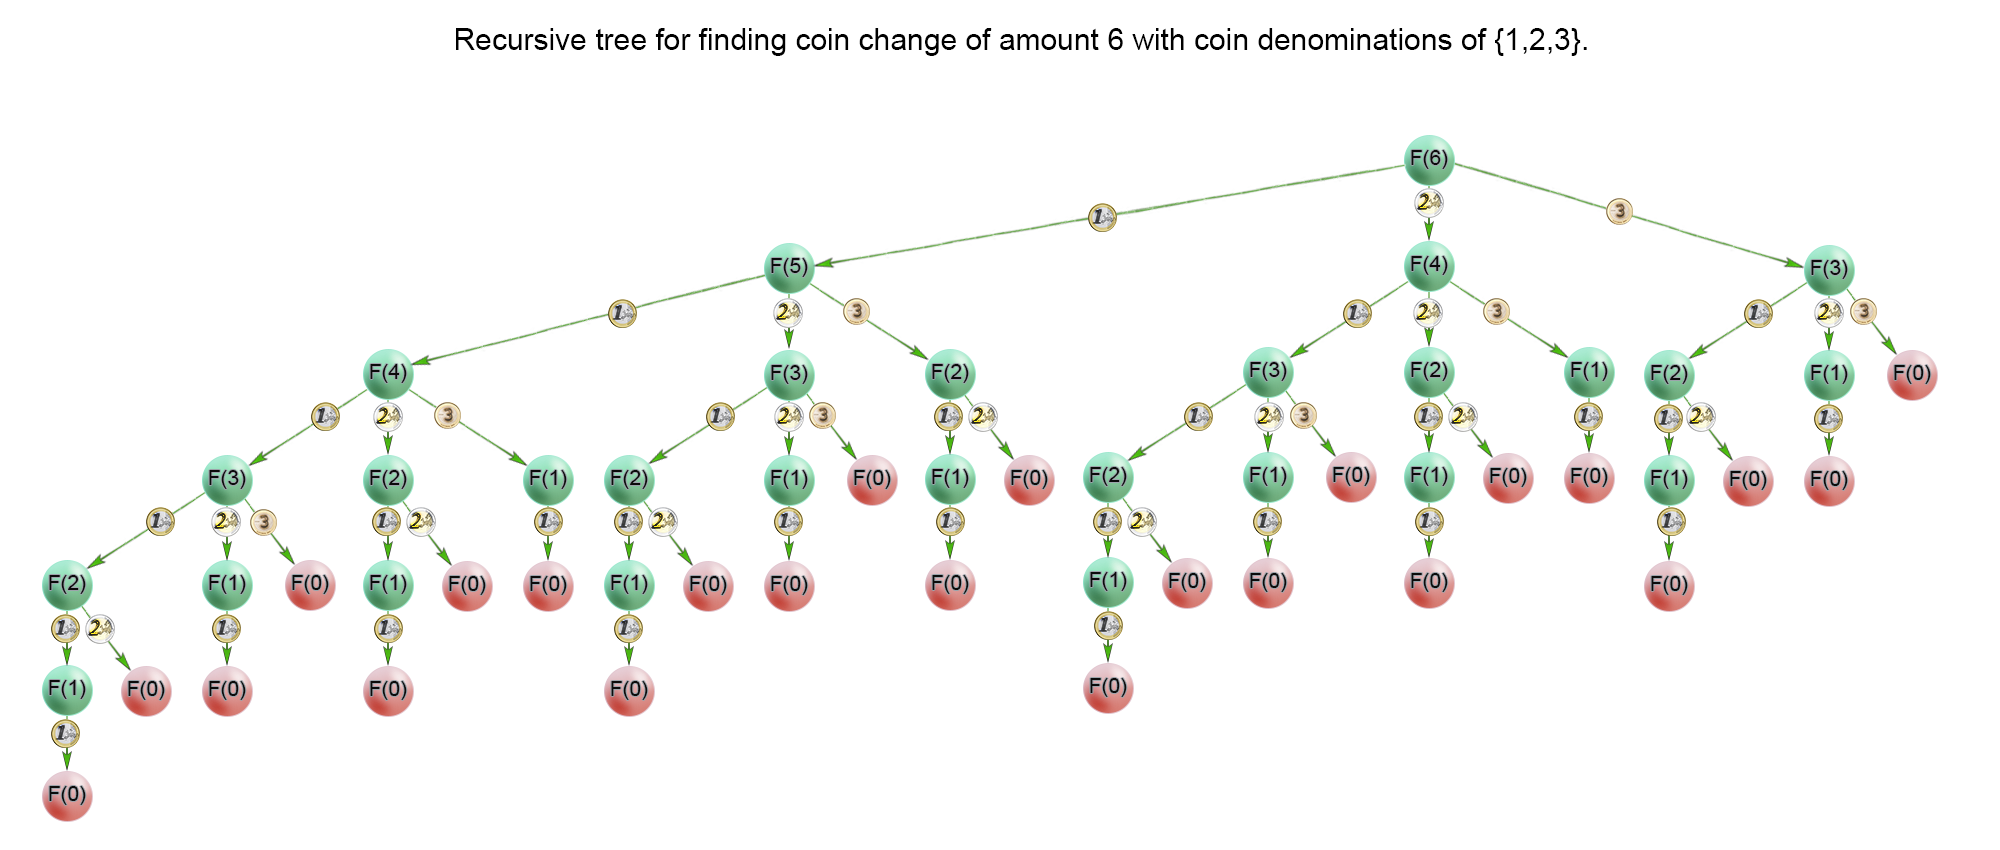

https://www.youtube.com/watch?v=jgiZlGzXMBw


In [2]:
def coinChange(coins, amount):
    MAX = float('inf')
    coins.sort()
    dp = [0]+ [MAX]*amount
    for i in range(1,amount+1):
        for c in coins:
            if c <= i:
                dp[i] = min(dp[i],dp[i-c]+1)
    return dp[amount] if dp[amount] != MAX else -1

coinChange([1,2,5],11)

3

In [ ]:
# Bottom Up
def coinChange(coins, amount):
    dp = [0] + [amount+1]*amount
    for coin in coins:
        for i in range(coin,amount+1):
            dp[i] = min(dp[i],dp[i-coin]+1)
    return dp[-1] if dp[-1]<= amount else -1

In [ ]:
# Bottom Up
def coinChange(coins, amount):
    dp = [0] + [amount+1]*amount
    for a in range(min(coins),amount+1):
        dp[a] = min([dp[a-coin] for coin in coins if coin <= a])+1
    return dp[-1] if dp[-1]<= amount else -1

## Approach 3: Dynamic programming - Top down
Algorithm

The idea of the algorithm is to build the solution of the problem from top to bottom. It applies the idea described above. It use backtracking and cut the partial solutions in the recursive tree, which doesn't lead to a viable solution. Тhis happens when we try to make a change of a coin with a value greater than the amount SS. To improve time complexity we should store the solutions of the already calculated subproblems in a table.


We'll use top down dynamic programming with memoization.

1. Base case: If the total is 0, return 0
2. If the total is already in the memo, return it
3. For each coin denomination:
    * If this coin > total, continue
    * Recurse, decreasing total by the coin denomination, keeping track of the min return
4. Set memo[total] to the min value + 1
5. Return the memo[total]

## Complexity Analysis

* Time complexity : O(S*n). where S is the amount, n is denomination count. In the worst case the recursive tree of the algorithm has height of SS and the algorithm solves only S subproblems because it caches precalculated solutions in a table. Each subproblem is computed with n iterations, one by coin denomination. Therefore there is O(S*n) time complexity.

* Space complexity : O(S), where S is the amount to change We use extra space for the memoization table.

In [ ]:
def coinChange(coins, amount):
    memo = {}
    MAX = float('inf')
    def dfs(c_i, remain):
        key = (c_i,remain)
        if key in memo:
            return memo[key]
        if c_i == len(coins) or remain < 0 :
            memo[key] = MAX
            return MAX
        if remain == 0:
            memo[key] = 0
            return 0
        # each coin we have 02 choice, use or not use it
        ans = min(dfs(c_i+1,remain),1+dfs(c_i,remain-coins[c_i]))
        memo[key] = ans
        return ans

    ret = dfs(0,amount)
    return ret if ret != MAX else -1

little optimization

## Approach BFS
This solution is inspired by the BFS solution for problem Perfect Square. Since it is to find the least coin solution (like a shortest path from 0 to amount), using BFS gives results much faster than DP.

In [3]:
def coinChange(coins, amount):
    level = visited = {0}
    number = 0
    while level:
        if amount in level:
            return number
        level = {l+c for l in level for c in coins if l+c <= amount} - visited
        visited |= level
        number +=1
    return -1

coinChange([1,2,5],11)

3

In [ ]:
def coinChange(self, coins, amount):
    if amount == 0:
        return 0
    coins.sort()
    queue = [amount]
    visited = [False]*(amount+1)
    num = 0
    while queue:
        num +=1
        temp = []
        for l in queue:
            visited[l] = True
            for coin in coins:
                if l == coin:
                    return num
                elif l < coin:
                    break
                else:
                    if not visited[l-coin]:
                        visited[l-coin] = True
                        temp.append(l-coin)

        queue = temp
    return -1